In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

,num,age,log(Te),log(L/Lo),Xc,Yc,Lg/L,rhoc,Tc,Radius,...,Dif,alpha,over,Rconv,Z,X,Mass,DPl1,Mover,m(he)
0,1,251.887,3.59102,2.29569,0.689,0.2843,1.0,0.000567,412017.0,30.7932,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.095310e+09,1.0,0.0
1,2,478.971,3.59310,2.26856,0.689,0.2843,1.0,0.000635,428097.0,29.5621,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.026890e+09,1.0,0.0
2,3,730.051,3.59516,2.24145,0.689,0.2843,1.0,0.000712,444778.0,28.3834,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,9.626770e+08,1.0,0.0
3,4,1007.850,3.59719,2.21431,0.689,0.2843,1.0,0.000798,462097.0,27.2540,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.961590e+08,1.0,0.0
4,5,1314.930,3.59921,2.18721,0.689,0.2843,1.0,0.000894,480068.0,26.1723,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.342960e+08,1.0,0.0


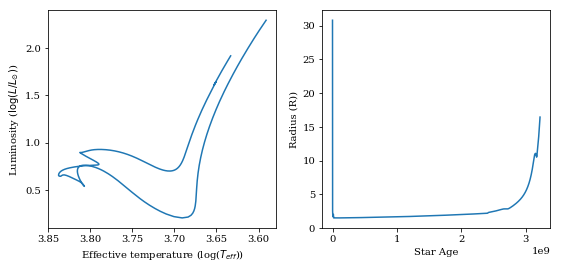

In [11]:
Masses = np.arange(1.40, 1.75, 0.01)
MetHe = ['X0.674.Z0.0329', 'X0.689.Z0.0267', 'X0.701.Z0.0216', 'X0.711.Z0.0174', 
         'X0.719.Z0.0140', 'X0.725.Z0.0112', 'X0.730.Z0.0090']
folder = "../../../../../Volumes/My Passport/NGC6819/"

file = "M1.50.X0.689.Z0.0267/M1.50.X0.689.Z0.0267-sum.txt"

df = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, 
                 names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                        'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])
display(df.head())

plt.figure(1, figsize=(9,4))
plt.subplot(121)
plt.plot(df['log(Te)'], df['log(L/Lo)'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.gca().invert_xaxis()
plt.xlabel('Effective temperature (log($T_{eff}$))')
plt.ylabel('Luminosity ($\log(L/L_{\odot})$)')
plt.subplot(122)
plt.plot(df['age'], df['Radius'])
plt.xlabel('Star Age')
plt.ylabel('Radius (R))')
plt.show()

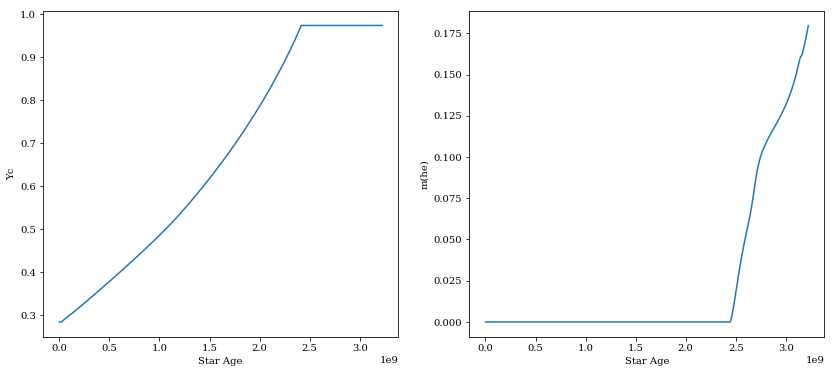

In [21]:
plt.figure(1, figsize=(14,6))
plt.subplot(121)
plt.plot(df['age'], df['Yc'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.xlabel('Star Age')
plt.ylabel('Yc')

plt.subplot(122)
plt.plot(df['age'], df['m(he)'])
plt.xlabel('Star Age')
plt.ylabel('m(he)')
plt.show()

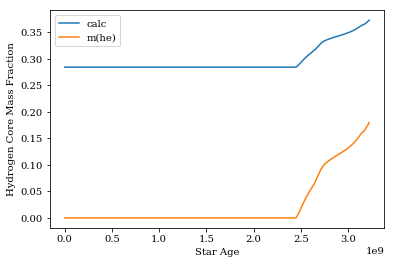

In [30]:
Y = (df['Yc']*df['m(he)']/1.4)+(1-df['X']-df['Z'])*((1.4-df['m(he)'])/1.4)
plt.plot(df['age'], Y, label='calc')
plt.plot(df['age'], df['m(he)'], label='m(he)')
plt.xlabel('Star Age')
plt.ylabel('Hydrogen Core Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
#print(max(df['age']))
#plt.xlim(2.2e9)
plt.legend()

(0, 17.5)

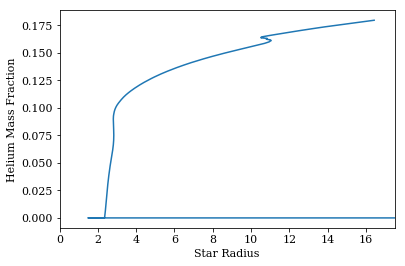

In [29]:
plt.plot(df['Radius'], df['m(he)'])
plt.xlabel('Star Radius')
plt.ylabel('Helium Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
plt.xlim([0, 17.5])

In [75]:
#Import output data
output = pd.read_csv('../data/output_back_filesremoved.csv', usecols=[1,11,24])
#Import APOKASC data
df_met = pd.read_csv('../data/APOKASCfull.csv')
#Import star classifications
df_class = pd.read_csv('../data/RGclassification.txt', header=None, delim_whitespace=True, names=['KIC', 'type'])
#Import stan fitted star parameters
df_stanstars = pd.read_csv('../data/stanfits/ngc6819_tau.csv', names = ['KIC', 'dnu',
                                         'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df_stanstars['KIC'] = df_stanstars['KIC'].astype(int)
df_stanstars.head()

,KIC,dnu,numax,epsilon,alpha,A,G,phi,tau
0,5113441,11.656231,147.589403,0.319526,0.007041,-0.000383,2.977093,3.001847,9.728926
1,5024240,12.040603,158.431371,0.176629,0.010885,0.022472,2.592157,-1.713254,11.153927
2,5111718,10.545146,134.502096,0.234344,0.006861,0.019893,2.333321,2.590378,9.942095
3,5112072,10.064219,126.089590,0.188076,0.009842,0.005777,3.094603,1.538497,9.669934
4,5024143,9.649640,119.377772,0.204265,0.011228,0.011179,3.086279,1.865371,11.112309


In [87]:
#display(df_met.KIC)
#display(df_stanstars.KIC)
#print(len(df_stanstars.KIC))
metap = []
masap = []
df_dropped = df_stanstars
for i in df_stanstars.KIC:
    if i in df_met.KIC.values:
        metap.append(df_met.loc[df_met.KIC == i]['[M/H]2'].values[0])
        masap.append(df_met.loc[df_met.KIC == i]['M1'].values[0])
    else:
        
        df_dropped = df_dropped.drop(df_stanstars.loc[df_stanstars.KIC == i].index)

df_dropped['met'] = metap
df_dropped['mass'] = masap
df_dropped.head(200)

,KIC,dnu,numax,epsilon,alpha,A,G,phi,tau,met,mass
0,5113441,11.656231,147.589403,0.319526,0.007041,-0.000383,2.977093,3.001847,9.728926,0.13,1.43
1,5024240,12.040603,158.431371,0.176629,0.010885,0.022472,2.592157,-1.713254,11.153927,-0.09,0.00
2,5111718,10.545146,134.502096,0.234344,0.006861,0.019893,2.333321,2.590378,9.942095,0.14,1.61
3,5112072,10.064219,126.089590,0.188076,0.009842,0.005777,3.094603,1.538497,9.669934,0.04,1.66
4,5024143,9.649640,119.377772,0.204265,0.011228,0.011179,3.086279,1.865371,11.112309,0.06,1.64
8,4937770,7.817803,96.416611,0.099063,0.007936,0.025544,3.642635,1.002277,10.496228,-0.01,1.66
12,5024476,5.731352,63.535827,0.042931,0.023907,0.015864,3.227749,0.424324,10.032849,0.11,2.27
13,5024043,5.580877,54.933883,0.118482,0.013717,0.014292,2.709787,-1.321259,9.836582,-0.19,1.35
14,5023889,5.331174,52.662994,0.141908,0.011309,0.015056,2.625103,0.136136,10.057674,0.15,1.45
15,5111940,5.113151,49.532774,0.176288,0.012286,0.025602,2.836555,5.662241,9.852791,0.06,1.52


0
94
111
108
57
33
Number of stars in APOKASC matching these ranges: 403


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


ValueError: x and y must be the same size

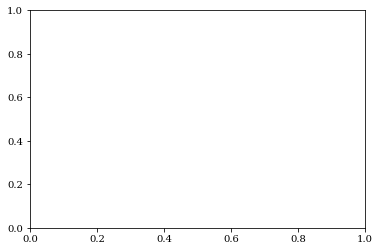

In [108]:
#Set ranges to find fitted stars in
masrng = 0.1
metrng = 0.075
met=0
dfs={}
IDss = {}
nstars = 0
for key,val in Masses.items():
    file = "m" + val + "y024z+000/M" + key + "_Y0.24_Z+0.00_0226.data"
    dfs[key] = (pd.read_csv(folder+file, skiprows=5, delim_whitespace=True))
    IDss[key] = df_met.loc[(df_met['M1'] <= float(key)+masrng) & (df_met['M1'] >= float(key)-masrng) & 
                        (df_met['[M/H]2'] <= met+metrng) &(df_met['[M/H]2'] >= met-metrng)].KIC
    print(len(IDss[key]))
    nstars += len(IDss[key])
    
print('Number of stars in APOKASC matching these ranges:', nstars)
IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(dfs[key].loc[dfs[key]['log_R']]['total_mass_he4'])

#print('IDs of stars we have fitted data for:', IDs)

plt.scatter(Ys, As)
plt.xlabel('Helium mass fraction')
plt.ylabel('Glitch amplitude')

0
16
90
107
111
110
Number of stars in APOKASC matching these ranges: 434


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Text(0, 0.5, 'Glitch amplitude')

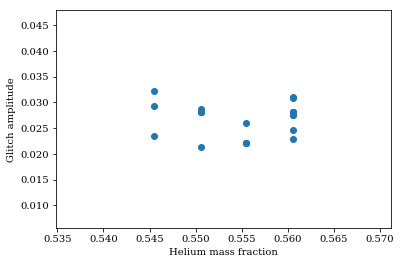

In [105]:
folder = "../data/models/"
Metses = {'-1.20':'-120', '-0.60':'-060', '-0.30':'-030', '-0.15':'-015', '+0.00':'+000', '+0.15':'+015'}
#Set ranges to find fitted stars in
masrng = 0.1
metrng = 0.075
mas = 1.20
dfs={}
IDss = {}
nstars = 0
for key,val in Metses.items():
    file = "m12y024z"+val+"/M1.2_Y0.24_Z"+key+"_0226.data"
    dfs[key] = (pd.read_csv(folder+file, skiprows=5, delim_whitespace=True))
    IDss[key] = df_met.loc[(df_met['M1'] <= mas+masrng) & (df_met['M1'] >= mas-masrng) & 
                        (df_met['[M/H]2'] <= float(key)+metrng) &(df_met['[M/H]2'] >= float(key)-metrng)].KIC
    print(len(IDss[key]))
    nstars += len(IDss[key])
    
print('Number of stars in APOKASC matching these ranges:', nstars)
IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(max(dfs[key]['total_mass_he4']))

#print('IDs of stars we have fitted data for:', IDs)

plt.scatter(Ys, As)
plt.xlabel('Helium mass fraction')
plt.ylabel('Glitch amplitude')

8.813747346384769


,l,n_pg,Re(freq),Im(freq),E_norm
0,0,1,13.271899,0.0,0.040650
1,0,2,24.354430,0.0,0.001965
2,0,3,34.093803,0.0,0.000230
3,0,4,43.140639,0.0,0.000035
4,0,5,51.082890,0.0,0.000010
5,0,6,59.309317,0.0,0.000005
6,0,7,67.349116,0.0,0.000003
7,0,8,75.606355,0.0,0.000002
8,0,9,84.135070,0.0,0.000002
9,0,10,92.623346,0.0,0.000002


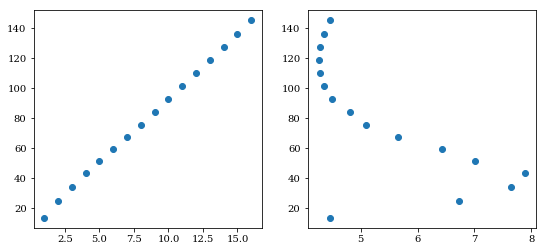

In [57]:
folder = "../data/models/"
file = "m10y024z+000/M1.0_Y0.24_Z+0.00_0226_7.summary.txt"

dg = pd.read_csv(folder+file, skiprows=5, delim_whitespace=True)#, names=['l', 'n', 'f0', 'f0im', 'e_norm'])
#dg['Re(freq)'] = dg['Re(freq)']*2*np.pi
dnuavg = np.mean(np.diff(dg['Re(freq)']))
print(dnuavg)
display(dg.head(10))

plt.figure(3, figsize=(9,4))
plt.subplot(121)
plt.scatter(dg['n_pg'], dg['Re(freq)'])
plt.subplot(122)
plt.scatter(dg['Re(freq)'] % dnuavg, dg['Re(freq)'])
plt.show()

In [15]:
file = "m10y024/M1.0_Y0.24_0212.index"
dh = pd.read_csv(folder+file, skiprows=1, delim_whitespace=True, names=['model','priority','profile'])
prof1 = dh.loc[(dh.priority == 1)]['model'].min()
prof2 = dh.loc[(dh.priority == 1)]['model'].max()
prof = [prof1, prof2]

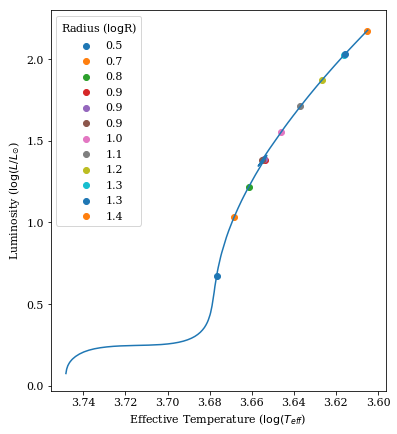

In [18]:
df = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.data', skiprows=5, delim_whitespace=True)
pts = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.index', skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
pts = pts.loc[(pts.priority == 1)]['model']

# This section of code is a test of a modification to the run_star_extras.f file
# that outputs a profile file when the star increases in radius in 0.1 log_R units.
# The conditions applied also allow multiple profiles to be produced for the region
# around the RGB bump.

# NOTE: This test appears to have been successful, and will now be applied to the
# grid of models.

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
#plt.scatter(df.loc[(df.model_number == 1500)]['log_Teff'],
#                df.loc[(df.model_number == 1500)]['log_L'], marker='x')
#plt.scatter(df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_Teff'],
#                df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
for i in pts:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],
                label = f'{label[0]:.1f}')
          
          
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(title=r'Radius ($\log$R)')


plt.show()

In [54]:
import glob
#folder = "~/Documents/mesa/models/"
#files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
#dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]
directory = '../../data/models/'

folders = sorted(os.listdir(directory))
folders.pop(0)
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))#, 'black'))
## Need to develop tool for taking Y values and masses and allocating colours/linestyles (to-do)

Y = 0.24
M = 1.0



plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    
    
    df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
    df = df.loc[(df.he_core_mass != 0.0)]
    dg = pd.read_csv(j[0], skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
    dg = dg.loc[(dg.priority == 1) & (dg.profile == 4)]['model']
    pt = dg.values
    print(str(i[0][42:45]))
    if not pt:
        continue
    else:
        if str(i[0][42:45]) == str(M):
            colour = next(colours)
            label = 'model '+str(int(pt))
            plt.scatter(df.loc[(df.model_number == int(pt))]['log_Teff'],
                    df.loc[(df.model_number == int(pt))]['log_L'], c=colour, label=label)
            label = str(i[0][47:51])
            #label = str(i[0][42:45])
            plt.plot(df['log_Teff'], df['log_L'], c=colour, zorder=0,
                     alpha=0.5, label=label)
    
    
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff})$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot})$)')
#plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../../data/models/'